# Exploring MUSDB18 Dataset

We will use **stempeg** for reading stem files.

In [2]:
import stempeg
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

## Load dataset structure

In [ ]:
data_path = Path('../data/raw/musdb18')
train_path = data_path / 'train'
test_path = data_path / 'test'

train_tracks = sorted(list(train_path.glob('*.stem.mp4')))
test_tracks = sorted(list(test_path.glob('*.stem.mp4')))

print(f"Training tracks: {len(train_tracks)}")
print(f"Test tracks: {len(test_tracks)}")
print(f"\nFirst 5 tracks:")
for track in train_tracks[:5]:
    print(f"  - {track.name}")

Training tracks: 100
Test tracks: 50

First 5 tracks:
  - A Classic Education - NightOwl.stem.mp4
  - ANiMAL - Clinic A.stem.mp4
  - ANiMAL - Easy Tiger.stem.mp4
  - ANiMAL - Rockshow.stem.mp4
  - Actions - Devil's Words.stem.mp4


## Load a single track and inspect stems

In [4]:
# Load first track
track_file = train_tracks[0]
print(f"Loading: {track_file.name}")

# Read stems: shape is (stems, samples, channels)
# stems order: 0=mix, 1=drums, 2=bass, 3=other, 4=vocals
audio, rate = stempeg.read_stems(str(track_file))

print(f"\nAudio shape: {audio.shape}")
print(f"Sample rate: {rate} Hz")
print(f"Duration: {audio.shape[1] / rate:.2f} seconds")
print(f"Channels: {audio.shape[2]}")
print(f"\nStems:")
print(f"  0: Mix")
print(f"  1: Drums") 
print(f"  2: Bass")
print(f"  3: Other")
print(f"  4: Vocals")

Loading: A Classic Education - NightOwl.stem.mp4

Audio shape: (5, 7552000, 2)
Sample rate: 44100 Hz
Duration: 171.25 seconds
Channels: 2

Stems:
  0: Mix
  1: Drums
  2: Bass
  3: Other
  4: Vocals


## Visualize waveforms

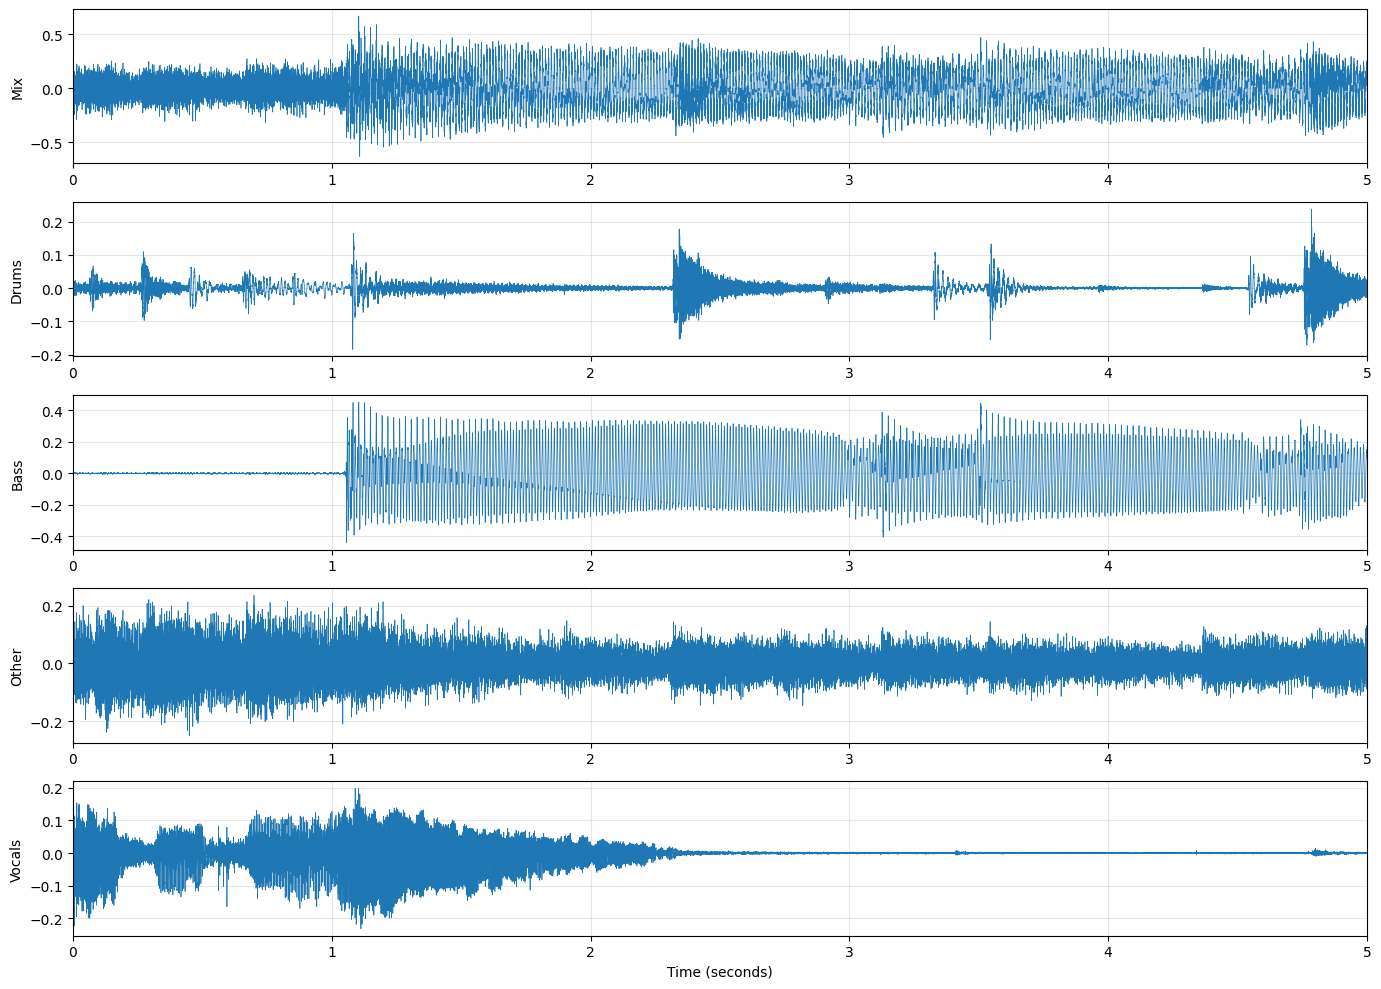

In [5]:
# Plot first 5 seconds of each stem (mono)
stem_names = ['Mix', 'Drums', 'Bass', 'Other', 'Vocals']
duration = 5  # seconds
samples = int(duration * rate)

fig, axes = plt.subplots(5, 1, figsize=(14, 10))
for i, (ax, name) in enumerate(zip(axes, stem_names)):
    # Convert to mono by averaging channels
    mono = audio[i, :samples, :].mean(axis=1)
    times = np.arange(len(mono)) / rate
    ax.plot(times, mono, linewidth=0.5)
    ax.set_ylabel(name)
    ax.set_xlim(0, duration)
    ax.grid(True, alpha=0.3)
    
axes[-1].set_xlabel('Time (seconds)')
plt.tight_layout()
plt.show()

## Compute and visualize spectrograms

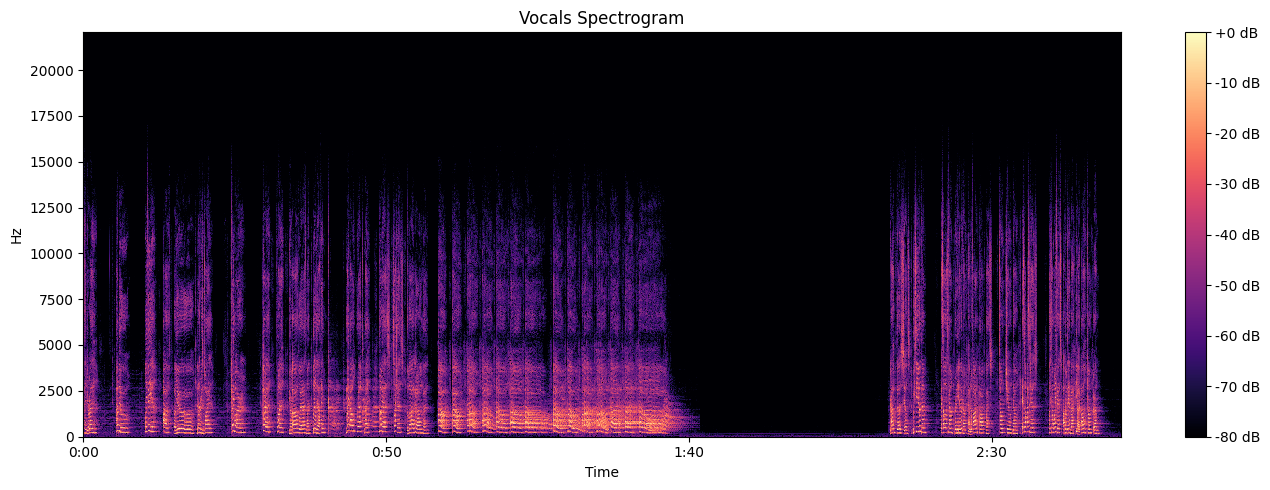

Spectrogram shape: (1025, 14751)
Frequency bins: 1025
Time frames: 14751


In [ ]:
# Compute STFT for vocals stem (mono)
vocals_mono = audio[4, :, :].mean(axis=1)
D = librosa.stft(vocals_mono)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=rate, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Vocals Spectrogram')
plt.tight_layout()
plt.show()

print(f"Spectrogram shape: {S_db.shape}")
print(f"Frequency bins: {S_db.shape[0]}")
print(f"Time frames: {S_db.shape[1]}")